Author: [Valentin Lehuger](https://github.com/valentinlehuger)

Skip the run test because the ROME version has to be updated to make it work in the exported repository. TODO: Update ROME and remove the `skiptest` flag.


# BMO ROME analysis

This notebook is about how the mapping between BMO and ROME works and how to interpret the differents job categroy identifiers.

The ROME is a job classification created by the french employment agency "pole emploi" and the BMO is a study of labour market emitted by a Statistics agency.

In [1]:
%matplotlib inline

import codecs
import os

import pandas as pd
import seaborn as sns

data_path = '../../../data'

## Load BMO datas

In [2]:
bmo_df = pd.read_csv(os.path.join(data_path, 'bmo/bmo_2015.csv'))
bmo_df.sample(frac=0.0001)

,Code bassin 2015,Nom bassin 2015,Famille métier,Libellé Famille métier,Métier,Libellé du métier,Code département,Nom Departement,Projets de recrutement totaux,Projets de recrutement difficiles,Projets de recrutement saisonniers,Code region,Nom Region
29593,8220,AUBENAS,A,Fonctions administratives,L1Z60,Employés de la comptabilité,07,ARDÈCHE,12.155072,12.155072,NaN,82,RHONE-ALPES
18049,4315,BELFORT,I,Ouvriers des secteurs de l'industrie,D1Z41,Ouvriers qualifiés travaillant par enlèvement ...,90,TERRITOIRE DE BELFORT,21.595010,21.595010,NaN,43,FRANCHE-COMTE
23580,5419,SAINTES,C,Fonctions d'encadrement,N0Z90,"Ingénieurs et cadres d'études, recherche et dé...",17,CHARENTE-MARITIME,2.313398,NaN,NaN,54,POITOU-CHARENTES
26733,7323,DECAZEVILLE VILLEFRANCHE,V,"Fonctions liées à la vente, au tourisme et aux...",R2Z80,Commerciaux (techniciens commerciaux en entrep...,12,AVEYRON,9.612025,NaN,NaN,73,MIDI-PYRENEES


In [3]:
# Select useful columns of codes and names
bmo_df = bmo_df[[2, 3, 4, 5]]
bmo_df.columns = [u'PROFESSION_FAMILY_CODE', u'PROFESSION_FAMILY_NAME', u'FAP_CODE', u'FAP_NAME'] 

bmo_df = bmo_df.sort_values(['PROFESSION_FAMILY_CODE', 'FAP_CODE'])

# create correspondance profession_family/fap codes df
FAP_profession_family = bmo_df[[u'PROFESSION_FAMILY_CODE', u'FAP_CODE']].drop_duplicates()

# Create correspondance code/name dfs
profession_family_correspondance = bmo_df[[u'PROFESSION_FAMILY_CODE', u'PROFESSION_FAMILY_NAME']].drop_duplicates()
FAP_correspondance = bmo_df[[u'FAP_CODE', u'FAP_NAME']].drop_duplicates().sort_values([u'FAP_CODE'])

This document (http://travail-emploi.gouv.fr/IMG/pdf/FAP-2009_Introduction_et_table_de_correspondance.pdf) gives a very good explanation of how the FAP codes are built.

The first character is the professional field. (A = Agriculture, marins, fishing / B = Civil engineering / C = Electricity, electronics, etc)

The second and third characters are used to group 87 FAP categories.

The fourth character indicatesthe qualification level. (0 = undefined, 2 = unskilled worker to 9 = engineer and manager)

The fifth character is used to group the professionnal families in to 225 more specific categories.

## Load ROME datas

In [4]:
rome_df = pd.read_csv(os.path.join(data_path, 'rome/csv/unix_referentiel_appellation_v329_utf8.csv'))

# Select useful columns of codes and names
rome_df = rome_df[['code_ogr', 'libelle_appellation_court', 'code_rome']]
rome_df.columns = [u'OGR_CODE', u'ROME_PROFESSION_SHORT_NAME', u'ROME_PROFESSION_CARD_CODE']
rome_df = rome_df[[u'OGR_CODE', u'ROME_PROFESSION_SHORT_NAME', u'ROME_PROFESSION_CARD_CODE']].drop_duplicates().sort_values([u'OGR_CODE', u'ROME_PROFESSION_CARD_CODE'])

In [5]:
print("{} uniques romes.".format(len(rome_df.ROME_PROFESSION_CARD_CODE.unique())))

531 uniques romes.


In [6]:
rome_df[rome_df.ROME_PROFESSION_CARD_CODE == "L1503"]

,OGR_CODE,ROME_PROFESSION_SHORT_NAME,ROME_PROFESSION_CARD_CODE
3,10203,Accessoiriste,L1503
4,10204,Accessoiriste de plateau,L1503
5,10205,Accessoiriste en effets spéciaux,L1503
934,11143,Armurier / Armurière spectacle,L1503
942,11151,Artificier / Artificière spectacle,L1503
943,11152,Artificier / Artificière spectacles pyrotechni...,L1503
1052,11261,Assistant décorateur / Assistante décoratrice ...,L1503
1773,12002,Chef accessoiriste,L1503
1787,12016,Chef constructeur / constructrice en décors,L1503
2146,12383,Chef décorateur / décoratrice spectacle,L1503


## Load BMO/ROME correspondance

In [7]:
def parse_faprome_file(filename):
    with codecs.open(filename, 'r', 'latin-1') as txtfile:
        table = pd.DataFrame([x.replace('"', '').split("=") for x in txtfile.readlines() if x.startswith('"')])
    return table
    
bmo_rome = parse_faprome_file(os.path.join(data_path, 'crosswalks/passage_fap2009_romev3.txt'))
bmo_rome[0] = bmo_rome.apply(lambda x: [s.strip() for s in x[0].split(',')], axis=1)
bmo_rome[1] = bmo_rome.apply(lambda x: x[1].replace('\n', '').replace('\r', '').replace('\t', '').strip(), axis=1)

bmo_rome.columns = [u"ROME", u"FAP"]

s = bmo_rome.ROME.apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = u"ROME"

bmo_rome = bmo_rome[[u"FAP"]].join(s)
bmo_rome_entire = bmo_rome
bmo_rome = bmo_rome[bmo_rome.ROME.str.len() == 5]

In [8]:
print("{} uniques romes.".format(len(bmo_rome.ROME.unique())))

330 uniques romes.


In [9]:
bmo_rome.head()

,FAP,ROME
0,A0Z41,A1403
0,A0Z41,A1407
0,A0Z41,A1408
0,A0Z41,A1409
0,A0Z41,A1410


In [10]:
A = pd.merge(bmo_rome, rome_df, left_on="ROME", right_on=u"ROME_PROFESSION_CARD_CODE")[["FAP", "ROME", "OGR_CODE", "ROME_PROFESSION_SHORT_NAME"]]

In [11]:
bmo_rome_merged = pd.merge(A, bmo_df, left_on="FAP", right_on="FAP_CODE").drop_duplicates()[["FAP", "ROME", "OGR_CODE", "ROME_PROFESSION_SHORT_NAME", "PROFESSION_FAMILY_CODE", "PROFESSION_FAMILY_NAME", "FAP_NAME"]]

In [12]:
bmo_rome_merged.sample(frac=0.01).head()

,FAP,ROME,OGR_CODE,ROME_PROFESSION_SHORT_NAME,PROFESSION_FAMILY_CODE,PROFESSION_FAMILY_NAME,FAP_NAME
127832,C2Z71,H1202,12162,Chef de groupe dessinateurs en électricité-éle...,T,Autres techniciens et employés,Dessinateurs en électricité et en électronique
582396,N0Z90,M1808,10317,Administrateur / Administratrice Systèmes d''I...,C,Fonctions d'encadrement,"Ingénieurs et cadres d'études, recherche et dé..."
763144,R4Z92,D1504,14321,Directeur / Directrice de réseau de la distrib...,C,Fonctions d'encadrement,Cadres des magasins de vente du commerce de dé...
223641,G1Z70,I1302,14652,Electromécanicien(ne) de maintenance en automa...,T,Autres techniciens et employés,Techniciens et agents de maîtrise de la mainte...
217314,G1Z70,I1301,19814,Technicien(ne) de maintenance de portes automa...,T,Autres techniciens et employés,Techniciens et agents de maîtrise de la mainte...


There are 4 kinds of codes to describe jobs in ROME and BMO datasets

Identifiers created by Pole emploi : ROME and OGR_CODE
Identifiers created by DARES (Statistics Agency) : FAP and PROFESSION_FAMILY_CODE

From larger to smaller groups, we get :
PROFESSION_FAMILY_CODE > FAP > ROME_CODE > OGR_CODE

In the ROME classification, the OGR_CODE is the most accurate job identifier
(example: props or pyrotechnist or marketing director).

In [13]:
rome_df[rome_df.ROME_PROFESSION_CARD_CODE == "L1503"].head()

,OGR_CODE,ROME_PROFESSION_SHORT_NAME,ROME_PROFESSION_CARD_CODE
3,10203,Accessoiriste,L1503
4,10204,Accessoiriste de plateau,L1503
5,10205,Accessoiriste en effets spéciaux,L1503
934,11143,Armurier / Armurière spectacle,L1503
942,11151,Artificier / Artificière spectacle,L1503


A ROME_PROFESSION_CARD_CODE is a group of OGR_CODE for very similar jobs in one field on a same hierarchical level.
(example in entertainment field: props, pyrotechnist, steward are under the same ROME_PROFESSION_CARD_CODE)

In [14]:
bmo_rome_merged[bmo_rome_merged.FAP == "U1Z80"].sample(frac=0.05)

,FAP,ROME,OGR_CODE,ROME_PROFESSION_SHORT_NAME,PROFESSION_FAMILY_CODE,PROFESSION_FAMILY_NAME,FAP_NAME
1031996,U1Z80,L1501,11301,Assistant maquilleur / Assistante maquilleuse ...,C,Fonctions d'encadrement,Professionnels des spectacles
1053299,U1Z80,L1505,11659,Cameraman / Camerawoman,C,Fonctions d'encadrement,Professionnels des spectacles
1073550,U1Z80,L1509,18745,Responsable de la logistique de spectacles,C,Fonctions d'encadrement,Professionnels des spectacles
1053562,U1Z80,L1505,12583,Chef opérateur / opératrice de prise de vues,C,Fonctions d'encadrement,Professionnels des spectacles
1056718,U1Z80,L1505,19988,Technicien / Technicienne d''exploitation vidéo,C,Fonctions d'encadrement,Professionnels des spectacles
1022002,U1Z80,L1302,18750,Responsable de la programmation audiovisuelle,C,Fonctions d'encadrement,Professionnels des spectacles
1050932,U1Z80,L1504,18424,Régisseur / Régisseuse lumière,C,Fonctions d'encadrement,Professionnels des spectacles
1049880,U1Z80,L1504,15431,Groupiste/groupman / Groupiste/groupwoman,C,Fonctions d'encadrement,Professionnels des spectacles
1068816,U1Z80,L1508,15725,Ingénieur / Ingénieure du son,C,Fonctions d'encadrement,Professionnels des spectacles
1043042,U1Z80,L1503,11151,Artificier / Artificière spectacle,C,Fonctions d'encadrement,Professionnels des spectacles


The FAP code is a larger group of jobs which can include multiple ROME_PROFESSION_CARD_CODE in same a field with differents hierarchical levels.
(example: props, pyrotechnist, steward are grouped with production manager and ballet director)

In [15]:
bmo_rome_merged[bmo_rome_merged.PROFESSION_FAMILY_CODE == "C"].head()

,FAP,ROME,OGR_CODE,ROME_PROFESSION_SHORT_NAME,PROFESSION_FAMILY_CODE,PROFESSION_FAMILY_NAME,FAP_NAME
111528,B7Z91,F1203,12079,Chef de carrière,C,Fonctions d'encadrement,"Ingénieurs du bâtiment et des travaux publics,..."
111726,B7Z91,F1203,12092,Chef de chantier de forage,C,Fonctions d'encadrement,"Ingénieurs du bâtiment et des travaux publics,..."
111924,B7Z91,F1203,12098,"Chef de chantier pétrole, gaz",C,Fonctions d'encadrement,"Ingénieurs du bâtiment et des travaux publics,..."
112122,B7Z91,F1203,12153,Chef de gisement,C,Fonctions d'encadrement,"Ingénieurs du bâtiment et des travaux publics,..."
112320,B7Z91,F1203,12194,Chef de mission prospection minière,C,Fonctions d'encadrement,"Ingénieurs du bâtiment et des travaux publics,..."


PROFESSION_FAMILY_CODE is the largest group of all identifiers. Each classification id includes many FAP codes.
It contains 7 class of jobs within Administrative jobs, social and medical jobs, etc...

## Distribution of ROME count by FAP

mean : 2.4154
standard deviation : 1.9600
89.23% of FAP contains less than 5 ROME.


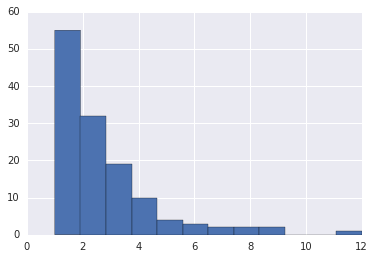

In [16]:
unique_fap_rome_couples = bmo_rome_merged[["FAP", "ROME"]].drop_duplicates()
rome_by_fap_count = unique_fap_rome_couples.groupby("FAP")["ROME"].count()

rome_by_fap_count.hist(bins=rome_by_fap_count.max())
print("mean : {0:.4f}".format(rome_by_fap_count.mean()))
print("standard deviation : {0:.4f}".format(rome_by_fap_count.std()))

print("{0:.2f}% of FAP contains less than 5 ROME.".format(rome_by_fap_count[rome_by_fap_count <= 4].count() / 130. * 100))

The FAP code seems to be a pretty low level of job groups. 2/3 FAP contains one or two ROME.

In [17]:
FAP_correspondance[FAP_correspondance.FAP_CODE.isin(rome_by_fap_count[rome_by_fap_count < 5].index)].sample(frac=0.3)

,FAP_CODE,FAP_NAME
71,S1Z20,"Aides, apprentis, employés polyvalents de cuis..."
87,V3Z90,"Psychologues, psychothérapeutes"
1908,V2Z91,Dentistes
689,U1Z81,Photographes
80,U0Z91,Cadres et techniciens de la documentation
1019,V1Z81,Sages-femmes
85,V3Z70,Techniciens médicaux et préparateurs
51,J3Z40,Conducteurs de véhicules légers (conducteurs d...
331,U0Z92,Journalistes et cadres de l'édition
680,T3Z60,"Concierges, gardiens d'immeubles"


The designations of FAP under 5 ROME are very specific. For example doctors (V2Z90), dentists (V2Z91), pharmacists (V2Z93), telemarketers (R1Z67)

In [18]:
FAP_correspondance[FAP_correspondance.FAP_CODE.isin(rome_by_fap_count[rome_by_fap_count >= 5].index)]

,FAP_CODE,FAP_NAME
244,A0Z41,Éleveurs salariés
614,F5Z70,"Techniciens et agents de maîtrise, matériaux s..."
48,G1Z70,Techniciens et agents de maîtrise de la mainte...
58,L5Z90,"Cadres administratifs, comptables et financier..."
66,R1Z62,"Vendeurs en habillement, accessoires et articl..."
69,R4Z90,"Cadres commerciaux, acheteurs et cadres de la ..."
118,T4Z62,Ouvriers de l'assainissement et du traitement ...
79,T6Z61,Employés des services funéraires et autres ser...
30,U1Z80,Professionnels des spectacles
332,U1Z82,"Graphistes, dessinateurs, stylistes, décorateu..."


The designations of FAP over 5 ROME are much larger group of jobs as other paramedical professions (V3Z80) or professionnal entertainers (U1Z80).

Although BMO and ROME are created by 2 different agencies, the FAP and ROME codes seems to be well mapped. 
Each FAP contains one or more ROME code.
Most FAP categories are very specific as 90% contains less than 5 ROME codes.